In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
pokemon = pd.read_csv('merged_pokemon.csv')

In [3]:
pokemon.head()

,Unnamed: 0,#,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,Catch Rate,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,318,53.000000,8.640988,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,405,67.500000,8.902247,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,525,87.500000,8.902247,1.0,Medium Slow,1059860,1.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,4,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,625,104.166667,18.747592,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,5,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,65,309,51.500000,8.995369,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


In [4]:
#X = pokemon.loc[:, 'Against Normal': 'Against Fairy']
X = pokemon.loc[:, 'HP':'BST']
X

,HP,Att,Def,Spa,Spd,Spe,BST
0,45,49,49,65,65,45,318
1,60,62,63,80,80,60,405
2,80,82,83,100,100,80,525
3,80,100,123,122,120,80,625
4,39,52,43,60,50,65,309
...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,600
796,50,160,110,160,110,110,700
797,80,110,60,150,130,70,600
798,80,160,60,170,130,80,680


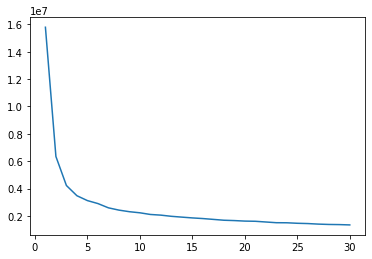

In [5]:
x = list(range(1,30+1))
y = []
for k in x:
  kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
  y.append(kmeans.inertia_)

plt.plot(x, y);
#print('The best k is k=3.')

In [6]:
n = 4
#Cluster Pokemon by what they are effective against
kmeans = KMeans(n_clusters=n, random_state=42).fit(X)
pokemon['Clusters'] = kmeans.labels_
#kmeans.inertia_

In [7]:
from sklearn.manifold import TSNE

# Lets dim reduce the 16 dimension vectors to 2 dimensions to vizualise the dataset 
data_embed=TSNE(n_components=2, perplexity=30, verbose=2, method='barnes_hut').fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 800 samples in 0.001s...
[t-SNE] Computed neighbors for 800 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 24.547300
[t-SNE] Computed conditional probabilities in 0.054s
[t-SNE] Iteration 50: error = 61.6680832, gradient norm = 0.3720049 (50 iterations in 0.351s)
[t-SNE] Iteration 100: error = 60.1842766, gradient norm = 0.3749165 (50 iterations in 0.329s)
[t-SNE] Iteration 150: error = 59.3471680, gradient norm = 0.3741583 (50 iterations in 0.306s)
[t-SNE] Iteration 200: error = 59.7212753, gradient norm = 0.3569490 (50 iterations in 0.281s)
[t-SNE] Iteration 250: error = 59.0900879, gradient norm = 0.3600621 (50 iterations in 0.307s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.090088
[t-SNE] Iteration 300: error = 0.8935369, gradient norm = 0.0010046 (50 iterations in 0.299s)
[t-SNE] Iteration 350: error = 0.8022227, gradient norm = 0.0002894 

In [8]:
#data_embed=TSNE(n_components=2, perplexity=30, verbose=2, method='barnes_hut').fit_transform(X)
df = pd.DataFrame(data_embed)
df = df.rename(columns={0: 'x', 1: 'y'})
df['Feature 1'] = pokemon['Name'].values
df['Feature 2'] = kmeans.labels_

df.head()

,x,y,Feature 1,Feature 2
0,-38.322086,-3.617401,Bulbasaur,1
1,-11.114436,-4.133008,Ivysaur,3
2,26.536968,1.901066,Venusaur,2
3,49.385967,10.621160,Mega Venusaur,0
4,-44.215931,-1.579044,Charmander,1


In [9]:
from google.colab.output import eval_js
from IPython.display import Javascript

In [10]:
!git clone https://github.com/CAHLR/d3-scatterplot.git

Cloning into 'd3-scatterplot'...
remote: Enumerating objects: 1045, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 1045 (delta 16), reused 0 (delta 0), pack-reused 1016
Receiving objects: 100% (1045/1045), 1.95 MiB | 15.73 MiB/s, done.
Resolving deltas: 100% (605/605), done.


In [11]:
df.to_csv('d3-scatterplot/poke.tsv', sep='\t', index=False)

In [12]:
def show_port(port, data_file, width=600, height=800):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%d) + '/index.html?dataset=%s'
    fm.width = '90%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, data_file, height)))

port = 8000
data_file = 'poke.tsv'
height = 1600

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port) 
show_port(port, data_file, height)

<IPython.core.display.Javascript object>

In [13]:
pokemon

,Unnamed: 0,#,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,Catch Rate,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI,Clusters
0,0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,318,53.000000,8.640988,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.00,0.5,0.5,0.25,2.00,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.00,0.5,0.7,6.9,14.1,1
1,1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,405,67.500000,8.902247,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.00,0.5,0.5,0.25,2.00,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.00,0.5,1.0,13.0,13.0,3
2,2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,525,87.500000,8.902247,1.0,Medium Slow,1059860,1.0,45,0.0,0.0,0.0,0.0,1.0,2.00,0.5,0.5,0.25,2.00,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.00,0.5,2.0,100.0,25.0,2
3,3,4,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,625,104.166667,18.747592,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,0.0,0.0,1.0,2.00,0.5,0.5,0.25,2.00,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.00,0.5,2.4,155.5,27.0,0
4,4,5,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,65,309,51.500000,8.995369,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,0.50,2.0,1.0,0.50,0.50,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.50,0.5,0.6,8.5,23.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,796,Diancie,Rock,Fairy,['Clear Body'],50,100,150,100,150,50,600,100.000000,40.824829,6.0,Slow,1250000,1.0,3,1.0,0.0,0.0,0.0,0.5,0.50,2.0,1.0,2.00,1.00,1.0,1.0,2.0,0.5,1.0,0.5,1.0,1.0,0.0,0.5,4.00,1.0,0.7,8.8,18.0,0
796,796,797,Mega Diancie,Rock,Fairy,['Magic Bounce'],50,160,110,160,110,110,700,116.666667,37.267800,6.0,Slow,1250000,1.0,3,1.0,1.0,0.0,0.0,0.5,0.50,2.0,1.0,2.00,1.00,1.0,1.0,2.0,0.5,1.0,0.5,1.0,1.0,0.0,0.5,4.00,1.0,1.1,27.8,23.0,0
797,797,798,Hoopa,Psychic,Ghost,['Magician'],80,110,60,150,130,70,600,100.000000,32.659863,6.0,Slow,1250000,1.0,3,1.0,0.0,0.0,0.0,0.0,1.00,1.0,1.0,1.00,1.00,0.0,0.5,1.0,1.0,0.5,1.0,1.0,4.0,1.0,4.0,1.00,1.0,0.5,9.0,36.0,0
798,798,799,Hoopa Unbound,Psychic,Dark,['Magician'],80,160,60,170,130,80,680,113.333333,42.295258,6.0,Slow,1250000,1.0,3,1.0,0.0,0.0,0.0,1.0,1.00,1.0,1.0,1.00,1.00,1.0,1.0,1.0,1.0,0.0,4.0,1.0,1.0,1.0,1.0,1.00,2.0,6.5,490.0,11.6,0


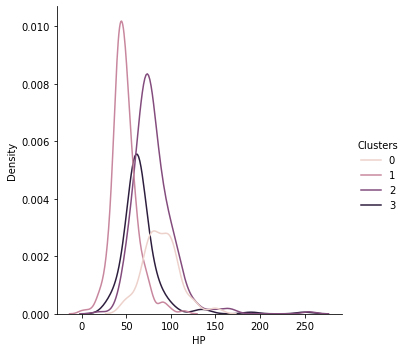

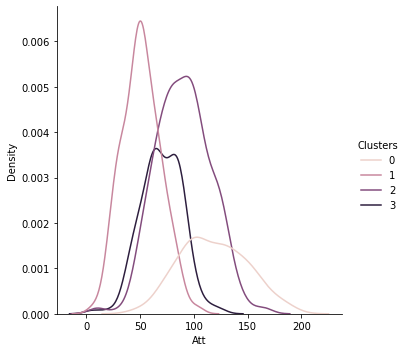

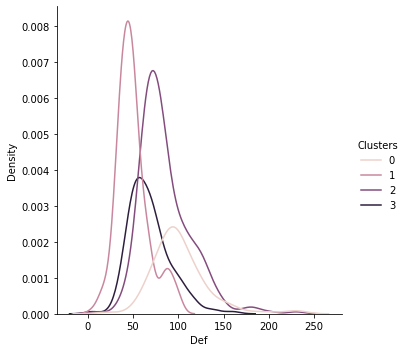

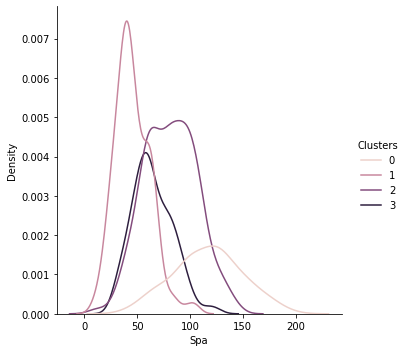

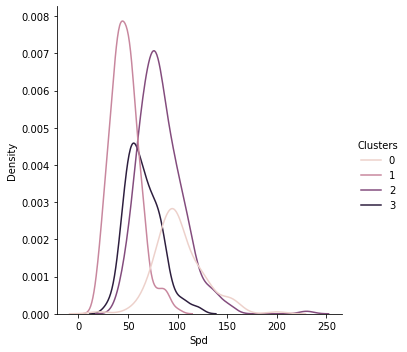

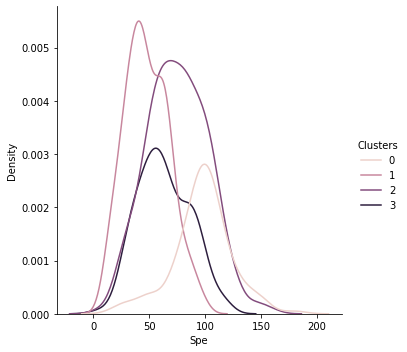

In [14]:
sns.displot(pokemon, x="HP", hue="Clusters", kind="kde")
sns.displot(pokemon, x="Att", hue="Clusters", kind="kde")
sns.displot(pokemon, x="Def", hue="Clusters", kind="kde")
sns.displot(pokemon, x="Spa", hue="Clusters", kind="kde")
sns.displot(pokemon, x="Spd", hue="Clusters", kind="kde")
sns.displot(pokemon, x="Spe", hue="Clusters", kind="kde")

In [15]:
pokemon['Clusters'] = kmeans.labels_
pok_melt = pd.melt(pokemon, id_vars = ['Clusters'], value_vars = ['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe'])

pok_melt.head()

,Clusters,variable,value
0,1,HP,45
1,3,HP,60
2,2,HP,80
3,0,HP,80
4,1,HP,39


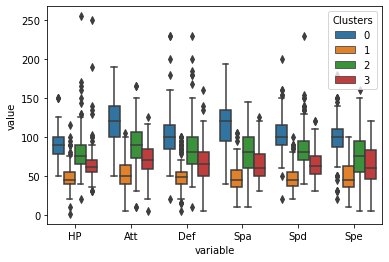

In [16]:
sns.boxplot(x="variable", y="value", hue = "Clusters", data=pok_melt)

In [17]:
pokemon[pokemon['Clusters']==0].drop(labels = "Unnamed: 0", axis = 1).head()

,#,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,Catch Rate,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI,Clusters
3,4,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,625,104.166667,18.747592,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,0.0,0.0,1.0,2.00,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0,0
7,8,Mega Charizard X,Fire,Dragon,['Tough Claws'],78,130,111,130,85,100,634,105.666667,20.154955,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,0.0,0.0,1.0,0.25,1.0,0.5,0.25,1.0,1.0,1.0,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0,1.7,110.5,38.2,0
8,9,Mega Charizard Y,Fire,Flying,['Drought'],78,104,78,159,115,100,634,105.666667,27.378012,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,0.0,0.0,1.0,0.50,2.0,2.0,0.25,1.0,0.5,1.0,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5,1.7,100.5,34.8,0
12,13,Mega Blastoise,Water,NaN,['Mega Launcher'],79,103,120,135,115,78,630,105.000000,20.952327,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,0.0,0.0,1.0,0.50,0.5,2.0,2.00,0.5,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.6,101.1,39.5,0
23,24,Mega Pidgeot,Normal,Flying,['No Guard'],83,80,80,135,80,121,579,96.500000,22.662377,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,0.0,0.0,1.0,1.00,1.0,2.0,0.50,2.0,1.0,1.0,0.0,1.0,1.0,0.50,2.0,0.0,1.0,1.0,1.0,1.0,2.2,50.5,10.4,0


In [18]:
pokemon[pokemon['Clusters']==1].drop(labels = "Unnamed: 0", axis = 1).head()

,#,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,Catch Rate,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI,Clusters
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,318,53.000000,8.640988,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1,1
4,5,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,65,309,51.500000,8.995369,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6,1
9,10,Squirtle,Water,NaN,"['Rain Dish', 'Torrent']",44,48,65,50,64,43,314,52.333333,8.919392,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,0.5,0.5,2.0,2.00,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.5,9.0,36.0,1
13,14,Caterpie,Bug,NaN,"['Run Away', 'Shield Dust']",45,30,35,20,20,45,195,32.500000,10.307764,1.0,Medium Fast,1000000,0.0,255,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.50,1.0,0.5,1.0,0.5,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.3,2.9,32.2,1
14,15,Metapod,Bug,NaN,['Shed Skin'],50,20,55,25,25,30,205,34.166667,13.359350,1.0,Medium Fast,1000000,0.0,120,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.50,1.0,0.5,1.0,0.5,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.7,9.9,20.2,1


In [19]:
weaker = pokemon[pokemon['Clusters']==1]
X = weaker.loc[:, 'HP':'BST']

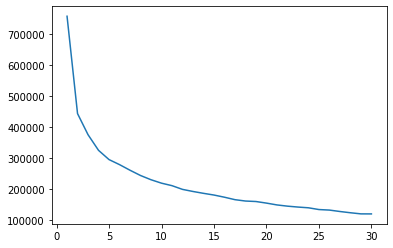

In [20]:
x = list(range(1,30+1))
y = []
for k in x:
  kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
  y.append(kmeans.inertia_)

plt.plot(x, y);
#print('The best k is k=3.')

In [21]:
k=3
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

In [22]:
weaker['Clusters']=kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
data_embed=TSNE(n_components=2, perplexity=30, verbose=2, method='barnes_hut').fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 233 samples in 0.001s...
[t-SNE] Computed neighbors for 233 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 233 / 233
[t-SNE] Mean sigma: 20.899288
[t-SNE] Computed conditional probabilities in 0.030s
[t-SNE] Iteration 50: error = 60.7479630, gradient norm = 0.5068182 (50 iterations in 0.072s)
[t-SNE] Iteration 100: error = 62.1245766, gradient norm = 0.4937709 (50 iterations in 0.070s)
[t-SNE] Iteration 150: error = 62.0177727, gradient norm = 0.5126514 (50 iterations in 0.098s)
[t-SNE] Iteration 200: error = 59.6844444, gradient norm = 0.5463593 (50 iterations in 0.085s)
[t-SNE] Iteration 250: error = 61.0456924, gradient norm = 0.5574644 (50 iterations in 0.085s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.045692
[t-SNE] Iteration 300: error = 0.6784445, gradient norm = 0.0026382 (50 iterations in 0.085s)
[t-SNE] Iteration 350: error = 0.6282095, gradient norm = 0.0016907 

In [24]:
df1 = pd.DataFrame(data_embed)
df1 = df1.rename(columns={0: 'x', 1: 'y'})
df1['Feature 1'] = weaker['Name'].values
df1['Feature 2'] = kmeans.labels_
df1.head()

,x,y,Feature 1,Feature 2
0,-3.461963,3.264010,Bulbasaur,1
1,-4.550998,-1.525094,Charmander,1
2,-0.278710,6.377529,Squirtle,0
3,12.445903,-13.561869,Caterpie,2
4,10.998525,-14.445662,Metapod,2


In [25]:
df1.to_csv('d3-scatterplot/pokeweak.tsv', sep='\t', index=False)

In [26]:
port = 8000
data_file = 'pokeweak.tsv'
height = 1600

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port) 
show_port(port, data_file, height)

<IPython.core.display.Javascript object>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b48f097f-607c-418a-bf15-19e0a2612faf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>